In [1]:
!git clone https://github.com/David-DangMinhDuc/thesis-SISA.git

Cloning into 'thesis-SISA'...
remote: Enumerating objects: 3751, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 3751 (delta 19), reused 32 (delta 10), pack-reused 3708
Receiving objects: 100% (3751/3751), 12.52 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (464/464), done.


In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_lst_orl = ['/content/thesis-SISA/SOURCE/results/orl/report_1_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/orl/report_5_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/orl/report_10_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/orl/report_a_part_of_5_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/orl/report_a_part_of_10_shards_1_slices_30_epochs.csv']

In [4]:
file_lst_ar = ['/content/thesis-SISA/SOURCE/results/ar/report_1_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/ar/report_5_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/ar/report_10_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/ar/report_a_part_of_5_shards_1_slices_30_epochs.csv',
'/content/thesis-SISA/SOURCE/results/ar/report_a_part_of_10_shards_1_slices_30_epochs.csv']

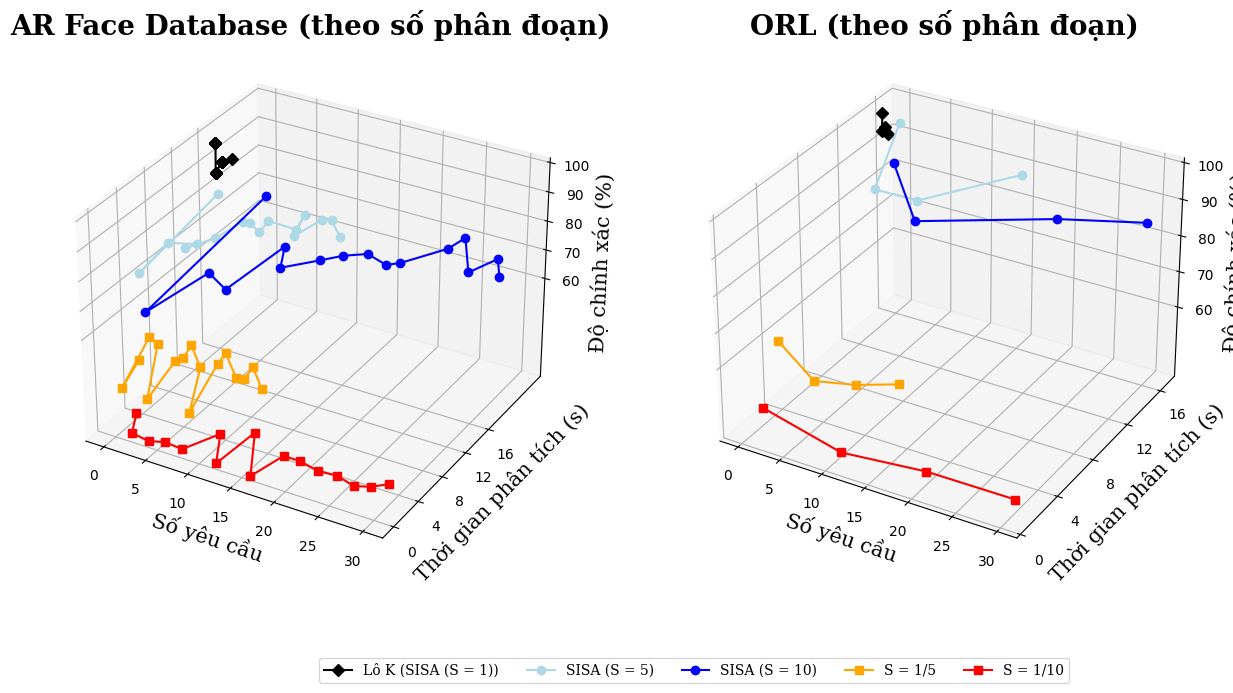

In [5]:
import math as m
import re
csfont = {'fontname':'serif'}
fig, ax = plt.subplots(1,2, figsize=(15,15), subplot_kw=dict(projection="3d"))
color_1 = ['#ADD8E6', 'blue', 'purple']
color_2 = ['orange', 'red', 'brown']
c1, c2 = 0,0
for ar in file_lst_ar:
  df = pd.read_csv(ar)
  x1 = df['nb_requests'].values
  y1 = df['retraining_time'].values
  z1 = df['accuracy'].values *100
  info = np.array(re.findall('\d+', ar), dtype=int)
  if 'a_part_of' in ar:
    ax[0].plot(x1,y1,z1, marker='s', color=color_2[c2], label=f"S = 1/{info[0]}")
    c2 += 1
  elif info[0] == 1:
    ax[0].plot(x1,y1,z1, marker='D', color='black', label="Lô K (SISA (S = 1))")
  else:
    ax[0].plot(x1,y1,z1, marker='o', color=color_1[c1], label=f"SISA (S = {info[0]})")
    c1+=1

ax[0].set_xticks(np.arange(0,31, 5))
ax[0].set_yticks(np.arange(0,17,4))
ax[0].set_zticks(np.arange(60,101,10))
ax[0].set_xlabel('Số yêu cầu', fontsize=15, **csfont)
ax[0].set_ylabel('Thời gian phân tích (s)', fontsize=15, **csfont)
ax[0].set_zlabel('Độ chính xác (%)', fontsize=15, **csfont)
ax[0].set_title('AR Face Database (theo số phân đoạn)', fontsize=20, fontweight="bold", **csfont)

co1, co2 = 0,0
for orl in file_lst_orl:
  df = pd.read_csv(orl)
  x = df['nb_requests'].values
  y = df['retraining_time'].values
  z = df['accuracy'].values *100
  info = np.array(re.findall('\d+', orl), dtype=int)
  if 'a_part_of' in orl:
    ax[1].plot(x,y,z, marker='s', color=color_2[co2], label=f"S = 1/{info[0]}")
    co2 += 1
  elif info[0] == 1:
    ax[1].plot(x,y,z, marker='D', color='black', label="Lô K (SISA (S = 1))")
  else:
    ax[1].plot(x,y,z, marker='o', color=color_1[co1], label=f"SISA (S = {info[0]})")
    co1+=1

ax[1].set_xticks(np.arange(0,31, 5))
ax[1].set_yticks(np.arange(0,17,4))
ax[1].set_zticks(np.arange(60,101,10))
ax[1].set_xlabel('Số yêu cầu', fontsize=15, **csfont)
ax[1].set_ylabel('Thời gian phân tích (s)', fontsize=15, **csfont)
ax[1].set_zlabel('Độ chính xác (%)', fontsize=15, **csfont)
ax[1].set_title('ORL (theo số phân đoạn)', fontsize=20,fontweight="bold", **csfont)
plt.legend(bbox_to_anchor=(0.75, -0.15), fontsize=15, ncol = 9, prop={'family': 'serif'})

plt.savefig('plot_base_shards.png')
plt.show()